In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

#### Examples of datasets

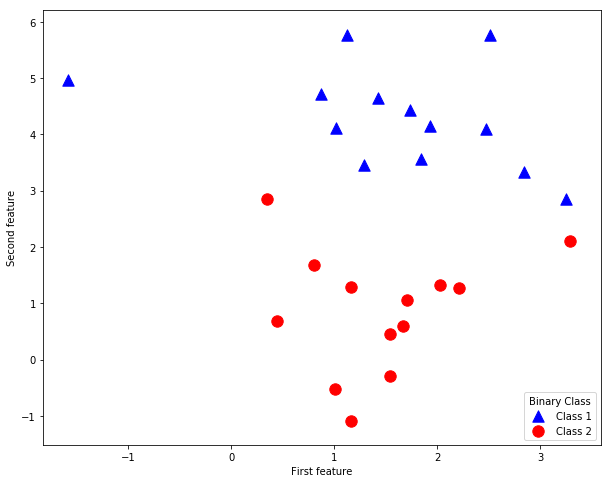

In [2]:
# random generated dataset
# generating dataset with 2 features and 26 samples
X, y = make_blobs(n_samples=26, n_features=2, centers=2, random_state=0)
# print(X.shape)
# print(y.shape)

# plot setup
plt.figure(figsize=(10,8))
plt.xlabel('First feature')
plt.ylabel('Second feature')

# sorting each elemt of datset to grops to plot data
samples = X.shape[0]
i = 0
while i < samples:
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], marker='^', c='blue', s=130, label='Class 1')
    else:
        plt.scatter(X[i, 0], X[i, 1], marker='o', c='r', s=130, label='Class 2')
    i += 1
    
plt.legend(['Class 1', 'Class 2'], loc=4, title='Binary Class');


In [3]:
# ploting dataset
# plt.legend(["Class 0", "Class 1"], loc=4)

In [4]:
# dataset from sckearn, alias cancer
# importing dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
# All keys are attributes
print('Cancer data: \n{}'.format(cancer.data[:2]))
print('Cancer targets: \n{}'.format(cancer.target[:40]))
print('Target names: \n{}'.format(cancer.target_names))
print('DESCR: \n{}'.format(cancer.DESCR)) # description of dataset
print('Feature names: \n{}'.format(cancer.feature_names))

Cancer data: 
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
Cancer targets: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0]
Target names: 
['malignant' 'benign']
DESCR: 
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Informatio

In [6]:
# It's important for data scientist to know the count of samples in data
print("Shape of cancer data:\n{}".format(cancer.data.shape))
# And I would know variety in targets (to know how many classes)
# Also we should analyse how many samples represent each class
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Shape of cancer data:
(569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


## K-nearest neighbors

In [7]:
from sklearn.model_selection import train_test_split # for splitting
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# generating random dataset
X, y = make_blobs(n_samples=26, n_features=2, centers=2, random_state=0)

# than we should split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# to fit and predict data we use different method
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train);

In [10]:
print("Test set prediction:\n{}".format(clf.predict(X_test)))

Test set prediction:
[0 0 1 0 1 1 1]


In [11]:
# eveluating model generalization
print("Test set prediction:\n{}".format(clf.score(X_test, y_test)))

Test set prediction:
1.0


In [12]:
##################
# write plot to show decision boundery
##################

Text(0,0.5,'Accuracy')

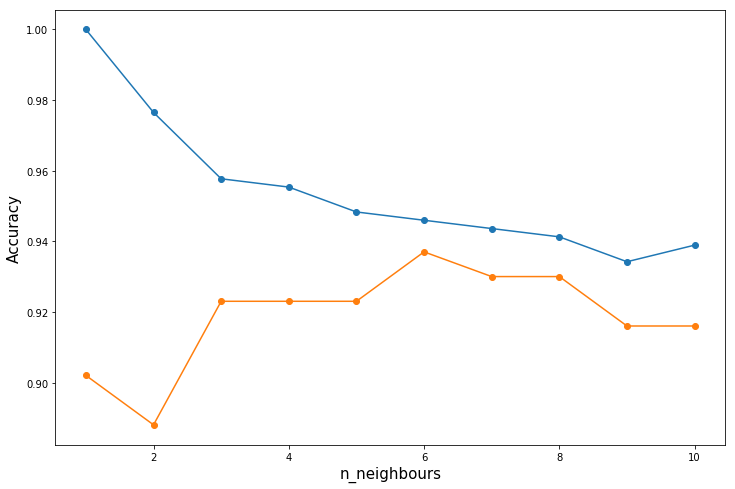

In [13]:
# investigate connection between model complexity and generalization
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    random_state=66)

training_accuracy = []
test_accuracy = []
neighbours_settings = range(1,11)
for n_neighbours in neighbours_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(12,8))
plt.plot(neighbours_settings, training_accuracy, label="Training accuracy", marker='o')
plt.plot(neighbours_settings, test_accuracy, label="Test accuracy", marker='o')
plt.xlabel("n_neighbours", size=15)
plt.ylabel("Accuracy", size=15)

# the best result when using six neighboards

## Linear Model

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

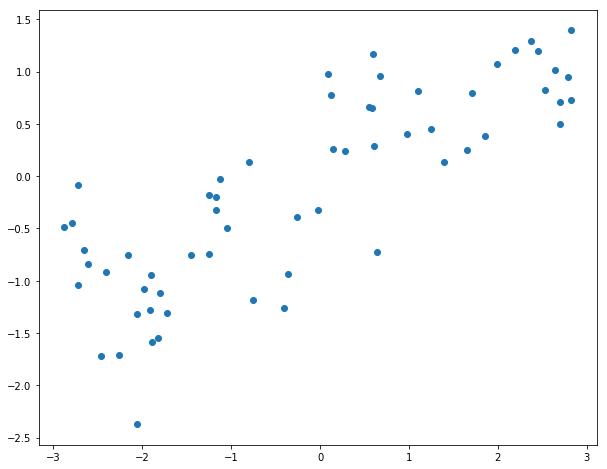

In [15]:
# generate dataset for linearn regretion model
n_samples = 60
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=n_samples)
y_no_noise = (np.sin(4 * X) + X)
y = (y_no_noise + rnd.normal(size=len(X))) / 2
X = X.reshape(-1, 1)
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker='o')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create and fit linear model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(float(lr.coef_)))
print("lr.intercept: {}".format(lr.intercept_))

lr.coef_: 0.39390555116733955
lr.intercept: -0.031804343026759746


In [17]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# actually, not very good result. in this case we have underfitting because we don't have enought data

Training set score: 0.67
Test set score: 0.66


In [18]:
# linear model for bost dataset
from sklearn.datasets import load_boston
# import pandas to drop boston dataset
import pandas as pd

In [19]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [20]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.64


In [21]:
##################
# if we deal with overfitting in regrettion
# we can uase L1 or L2 regularization
# which do the coefficient as small as possible
# We use regularization when we have less than 400 samples
# (for boston dataset) if we have more data reg. not so efficient
##################

### Linear Model for Classification

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

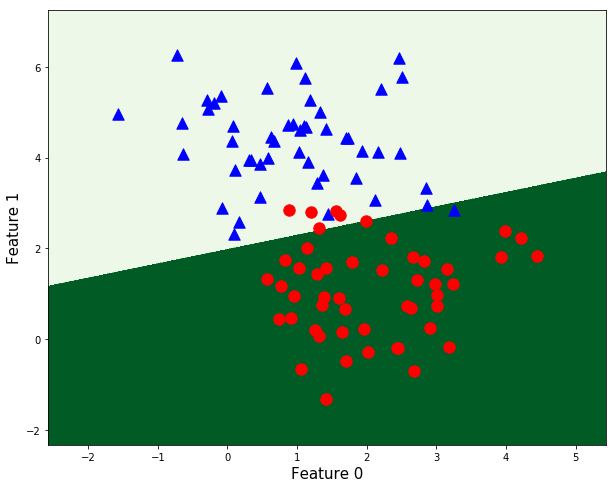

In [23]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# plot setup
plt.figure(figsize=(10,8))
plt.xlabel('Feature 0', size=15)
plt.ylabel('Feature 1', size=15)

#####################
# Make plot that show decision boundary
# for both linear classification methods
# with default parameters
####################
clf = LinearSVC().fit(X_train, y_train)

#create mesh to plot it
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)

# sorting each elemt of datset to grops to plot data
samples = X.shape[0]
i = 0
while i < samples:
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], marker='^', c='blue', s=130, label='Class 1')
    else:
        plt.scatter(X[i, 0], X[i, 1], marker='o', c='r', s=130, label='Class 2')
    i += 1

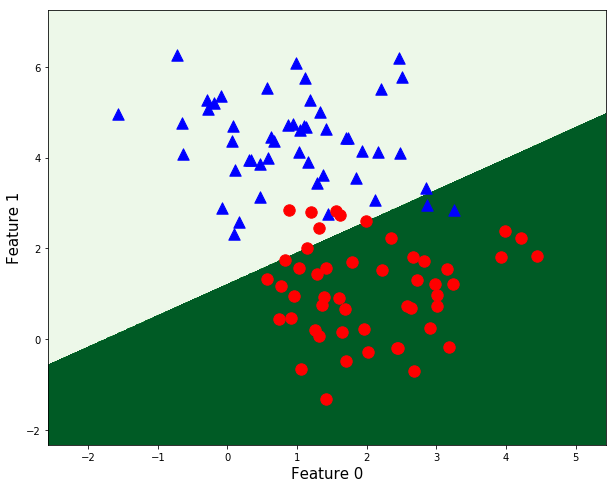

In [24]:
# plot setup
plt.figure(figsize=(10,8))
plt.xlabel('Feature 0', size=15)
plt.ylabel('Feature 1', size=15)

clf = LogisticRegression().fit(X_train, y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)

# sorting each elemt of datset to grops to plot data
samples = X.shape[0]
i = 0
while i < samples:
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], marker='^', c='blue', s=130, label='Class 1')
    else:
        plt.scatter(X[i, 0], X[i, 1], marker='o', c='r', s=130, label='Class 2')
    i += 1

In [25]:
#######################
# decision boundaries of a linear SVM
# for different values of C
#######################